In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:

base = automap_base()
base.prepare(engine, reflect=True)


In [8]:

base.classes.keys()

['measurement', 'station']

In [9]:

Station = base.classes.station
Measure = base.classes.measurement

In [10]:

session = Session(engine)
inspector = inspect(engine)

# Exploratory Climate Analysis

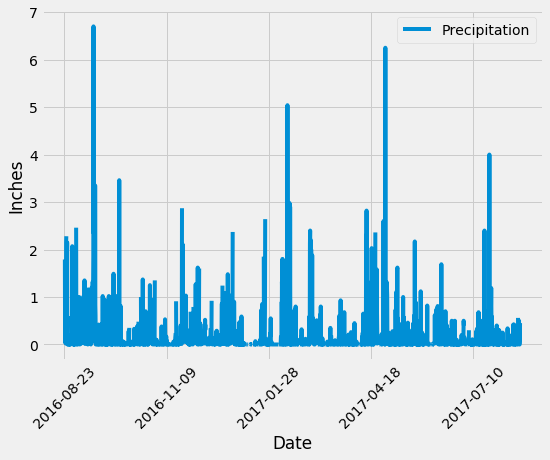

In [54]:
last_point = session.query(Measure.date).order_by(Measure.date.desc()).first()

last_twelve = session.query(Measure.date, Measure.prcp).filter(
                Measure.date > '2016-08-22').all()

prcp_df = pd.DataFrame(last_twelve, columns=['Date', 'Precipitation']).set_index(
    'Date').sort_values(
    by='Date', ascending=True)

prcp_df.plot(figsize=(8,6))
plt.ylabel('Inches')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.savefig("prcp.png")

In [64]:
sum_stats = prcp_df.agg({
    'Precipitation' : ['count','min', 'max', 'mean', 'median', 'std', 'var', 'sem']
})

sum_stats

,Precipitation
count,2021.000000
min,0.000000
max,6.700000
mean,0.177279
median,0.020000
std,0.461190
var,0.212696
sem,0.010259


In [21]:
locations = session.query(Measure.station).group_by(Measure.station).count()
locations

9

In [37]:
_stations = session.query(Measure.station, func.count(Measure.station)).group_by(
    Measure.station).order_by(func.count(Measure.station).desc()).all()

pd.DataFrame(_stations, columns=['ID', 'Count']).set_index('ID')

,Count
ID,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [35]:
most_act = _stations[0][0]

results = session.query(Measure.station, func.min(Measure.tobs), func.max(Measure.tobs), func.avg(Measure.tobs)).filter(
                Measure.station == most_act).all()
pd.DataFrame(results, columns=['ID', 'Lowest Temp', 'Highest Temp', 'Average Temp']).set_index('ID')

,Lowest Temp,Highest Temp,Average Temp
ID,,,
USC00519281,54.0,85.0,71.663781


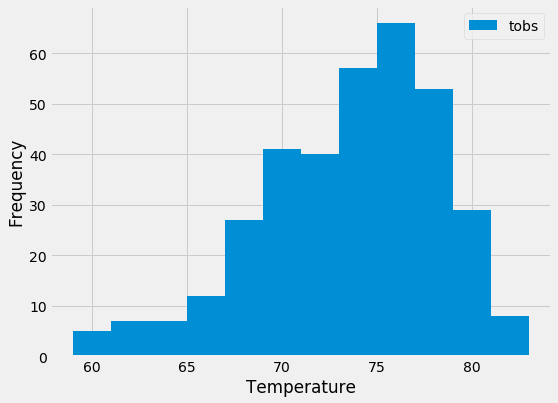

In [53]:
t_obs = session.query(Measure.tobs).filter(
    Measure.station == most_act).filter(
    Measure.date > '2016-08-22').all() 
pd.DataFrame(t_obs, columns=['tobs']).plot(kind='hist', bins=12, figsize=(8,6))
plt.xlabel('Temperature')
plt.savefig("t_obs.png")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
